In [2]:
import numpy as np
from numpy import random
from scipy import linalg, optimize, spatial

import matplotlib.pyplot as plt
from hdlogistic import *

In [3]:
from sklearn import datasets, neighbors, linear_model
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

See:http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py

In [4]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

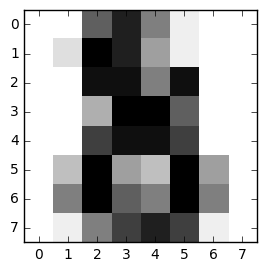

In [5]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Normal case(compare with orther 3 classifier: KNN, L1-logistic, SVC)

In [6]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(C=16)
LSVC_OvR = OneVsRestClassifier(LinearSVC(random_state=0))
hdlogistic_OvR = OneVsRestClassifier(HighDimensionalLogisticRegression(wn=0.4, kn= 2, trimming=False,
                                                                       ic='AIC',tol=1e-2))

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f' % logistic.fit(X_train, y_train).score(X_test, y_test))
print('LSVC_OvR score: %f' % LSVC_OvR.fit(X_train, y_train).score(X_test,y_test))
print('hdlogistic_OvR score: %f' % hdlogistic_OvR.fit(X_train, y_train).score(X_test,y_test))

KNN score: 0.961111
LogisticRegression score: 0.944444
LSVC_OvR score: 0.900000
hdlogistic_OvR score: 0.922222


# Add interaction terms

In [7]:
X_digits_cross = np.zeros([1797,64+64*63])

In [8]:
k2 = 63
for k1 in range(X_digits.shape[0]):
    for i in range(X_digits.shape[1]):
        for j in range(i+1,X_digits.shape[1]):
            k2 += 1
            X_digits_cross[k1,k2] = X_digits[k1,i] * X_digits[k1,j] / 15.0
    k2 = 63

In [9]:
X_train_cross = X_digits_cross[:int(.9 * n_samples)]
X_test_cross = X_digits_cross[int(.9 * n_samples):]

In [10]:
knn = neighbors.KNeighborsClassifier()
print('KNN score: %f' % knn.fit(X_train_cross, y_train).score(X_test_cross, y_test))

KNN score: 0.966667


In [11]:
logistic = linear_model.LogisticRegression(C=1)
print('LogisticRegression score: %f' % logistic.fit(X_train_cross, y_train).score(X_test_cross, y_test))

LogisticRegression score: 0.966667


In [12]:
LSVC_OvR = OneVsRestClassifier(LinearSVC(random_state=0))
print('LSVC_OvR score: %f' % LSVC_OvR.fit(X_train_cross, y_train).score(X_test_cross,y_test))

LSVC_OvR score: 0.966667


In [17]:
hdlogistic_OvR = OneVsRestClassifier(HighDimensionalLogisticRegression(wn = 0.3, kn= 1.5, 
                                                                       tol=1e-2,ic='AIC'))
print('hdlogistic_OvR score: %f' % hdlogistic_OvR.fit(X_train_cross, y_train).score(X_test_cross,y_test))

hdlogistic_OvR score: 0.933333
